# Algoritmo CART (classification using decision tree)

## Laboratorio 09 

Se busca entrenar un modelo para categorizar la información encontrando la frontera de desición, permite tener una mejor interpretabilidad que las redes neuronales dado que se puede tener una represetancion grafica del proceso de desiscion secuencial.

- ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine learning

Dado un conjunto de caracteristicas se establece una condición que realiza una particion binaria de los datos a clasificar repitiendo hasta encontrar particiones lo más homogenea posible.

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
#import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np

## 0. Esquema de clasificación decision tree

Text(0, 0.5, '$X_2$')

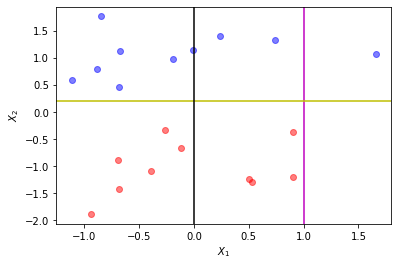

In [4]:
X0, y0 = make_classification(n_samples=20,
    n_features=2, n_redundant=0, n_informative=1, random_state=1, 
    n_clusters_per_class=1)

x=np.arange(-2, 3,1)
x_,y_ = np.meshgrid(x,x)

fig, ax = plt.subplots()
ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
#ax.plot(x_,y_,"k.")

ax.axvline(x = 1, color = 'm', label="x1<=1")
ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
ax.axvline(x = 0.0, color = 'k', label="x2<0.2")
#plt.legend(loc=3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

## Laboratorio 

## 1. Importar iris dataset


In [8]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [9]:
features=iris['data']
target=iris['target']

## 2. Cración de Dataframe

In [12]:
df=pd.DataFrame ( data=features, columns=iris['feature_names'])
df['target']=target

columns_name =[ "".join([c.capitalize() for c in cols.split() ] )
               for cols in df.columns ]

columns_name =[col.replace("(" ,"_") for col in columns_name ] 
cols = [col.replace(")" ,"") for col in columns_name ] 
df.columns=cols


df.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 3. División de datos

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Target'], axis = 1)
y = df['Target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Aplicación Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_cl = DecisionTreeClassifier()

tree_cl.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
tree_cl.score(X_train,y_train)

1.0

In [43]:
tree_cl.score(X_test,y_test)

1.0

Se observa que el algoritmo posee 100% de accuracy tanto en el conjunto de train como de test de tal manera que no es necesario realizar una optimización de hiperparámetros, esto es debido a que el dataset de Iris es bastante sencillo

## 5. Visualización árbol

In [34]:
from sklearn.tree import plot_tree

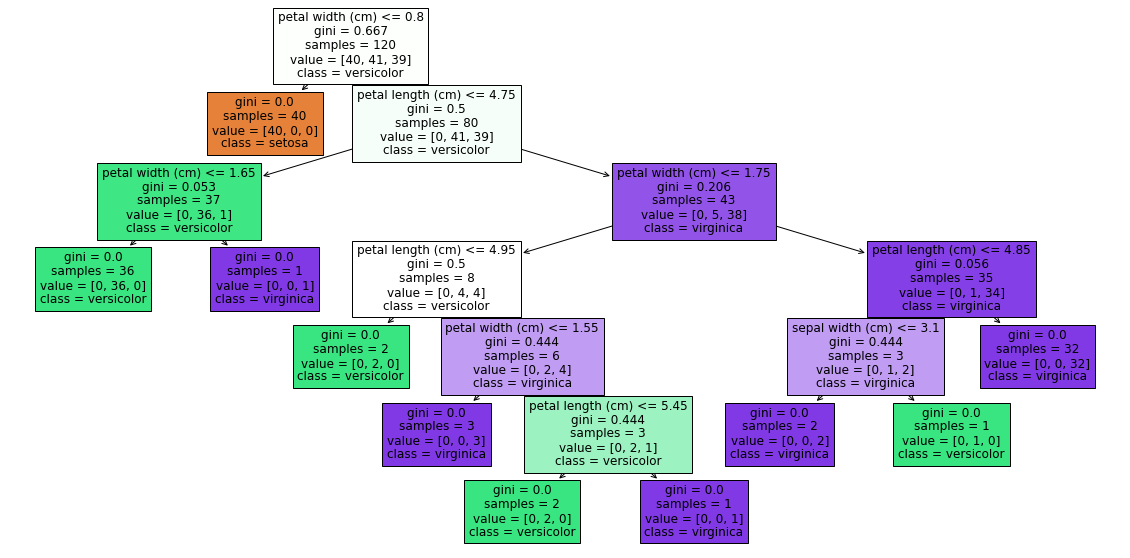

In [38]:
plt.figure(figsize=(20,10))
_ = plot_tree(tree_cl,
             feature_names=iris.feature_names,  
            class_names=iris.target_names,
            filled=True)

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Se observa que la característica más relevante para realizar la separación de los datos es el ancho de los pétalos


### Explicación parámetros de dendograma

Se busca tener nodos puros, es decir, que su índice de Gini sea 0, lo que indica que sólo una clase esté ahí

Se pude reutilizar las características

Los número dentro de la lista value significan [# setosa, # versicolor, # virginica]

class: es la clase más dominante en ese split

## 6. Cacterísticas más importantes

In [30]:
tree_cl.feature_importances_

array([0.        , 0.01667014, 0.40593501, 0.57739485])

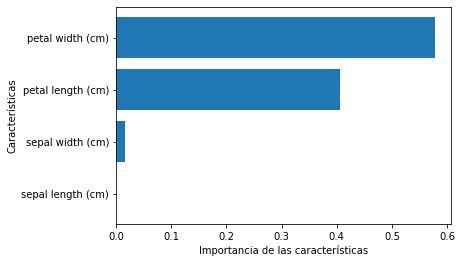

In [31]:
caract = iris.data.shape[1]
plt.barh(range(caract), tree_cl.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

## 7. Fronteras de decisión 

In [32]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

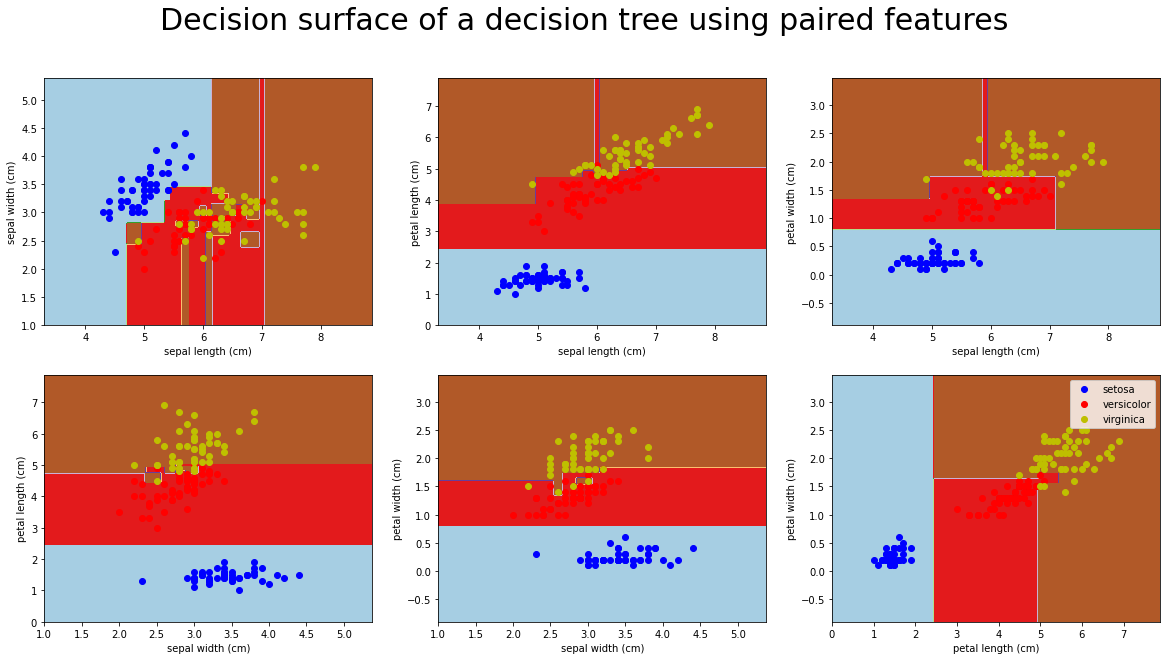

In [47]:
plt.figure(figsize=(20,10))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    
    #No es necesario estandarizar en los árboles de decision
    #mean = X.mean(axis=0)
    #std = X.std(axis=0)
    #X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    
    
   # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")
    
plt.suptitle("Decision surface of a decision tree using paired features", size = 30)
plt.legend()
plt.show()

## Conclusiones

De acuerdo a las fronteras de decisión de observa que existe un poco de overfitting pues existen zonas en las que se está realizando una división sólo por un punto. La manera de arreglar esto es disminuyendo la complejidad del modelo, en este caso disminuyendo el número de separación que se están realizando 